In [21]:
from google.colab import drive
import os

drive.mount("/content/gdrive")
path = "/content/gdrive/My Drive/Colab Notebooks"
os.chdir(path)
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 Dataset			       faces3.pkl	       X_test.pkl
 emb-model3.h5			       images_file1.pkl        X_train3.pkl
 emb-model.h5			       images_file3.pkl        X_train.pkl
 Face				       model-best-file1.hdf5   y_labels1.pkl
 Facenet			       model-best-file3.hdf5   y_labels3.pkl
 FaceNet1.ipynb			       Nghia.ipynb	       y_test3.pkl
'facenet-face-recognition (1).ipynb'   Predict.ipynb	       y_test.pkl
 facenet_face_recognition_VGG.ipynb    Predict_Long.ipynb      y_train3.pkl
 FaceNet.ipynb			       Untitled0.ipynb	       y_train.pkl
 FaceNet_v2.ipynb		       Untitled1.ipynb
 faces1.pkl			       X_test3.pkl


## Load Embedding_model

In [22]:
from keras.models import load_model
emb_model = load_model('./emb-model3.h5',compile=False)

In [23]:
import pickle

def _save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pickle(file_path):
  with open(file_path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [24]:
!pip install face_recognition

## Detect face

In [25]:
import cv2
from face_recognition import face_locations
import matplotlib.pyplot as plt
def _image_read(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image
# image = _image_read(IMAGE_TEST)
#trích xuất toạ độ face
def _extract_bbox(image, single = True):
  bboxs = face_locations(image)
  if len(bboxs)==0:
    return None
  if single:
    bbox = bboxs[0]
    return bbox
  else:
    return bboxs
def _extract_face(image, bbox, face_scale_thres = (20, 20), required_size=(160, 160)):
  h, w = image.shape[:2]
  try:
    (startY, startX, endY, endX) = bbox
  except:
    return None
  minX, maxX = min(startX, endX), max(startX, endX)
  minY, maxY = min(startY, endY), max(startY, endY)
  face = image[minY:maxY, minX:maxX].copy()
  # extract the face ROI and grab the ROI dimensions
  (fH, fW) = face.shape[:2]

  # ensure the face width and height are sufficiently large
  if fW < face_scale_thres[0] or fH < face_scale_thres[1]:
    return None
  else:
    img = cv2.resize(face,required_size)
    return img

In [26]:
def extract(image_path):
    image = _image_read(image_path)
    bbox =_extract_bbox(image, single=True)
    face = _extract_face(image, bbox, face_scale_thres = (20, 20))
    return face

In [27]:
link_train = _load_pickle('./X_train3.pkl')
link_test = _load_pickle('./X_test3.pkl')

In [28]:
link_train.shape

(888,)

In [29]:
import numpy as np
from keras.applications.resnet50 import preprocess_input


# img = _image_read(link_train[0])
# img.shape
# a = []
# a.append(img)
# np.array(a).shape
def preprocess_data(image_links):
  imgs = []
  for link in image_links:
    print(link)
    face = extract(link)
    if face is not None:
      imgs.append(face)
    else:
      next
  A = preprocess_input(np.array(imgs))
  return A
B = preprocess_data(link_train)
    

./Dataset/Hillary_Clinton/Hillary_Clinton_0002.jpg
./Dataset/thaotam/023.jpg
./Dataset/Jennifer_Capriati/Jennifer_Capriati_0032.jpg
./Dataset/James_Blake (1)/James_Blake_0014.jpg
./Dataset/chipu/013.jpg
./Dataset/Fidel_Castro/Fidel_Castro_0016.jpg
./Dataset/David_Beckham/David_Beckham_0005.jpg
./Dataset/Kim_Clijsters/Kim_Clijsters_0007.jpg
./Dataset/Vladimir_Putin/Vladimir_Putin_0036.jpg


In [ ]:
C = preprocess_data(link_test)


In [31]:
def get_data(image_links):
  imgs = []
  for link in image_links:
    face = extract(link)
    if face is not None:
      imgs.append(face)
    else:
      next
  return imgs

In [32]:
D = get_data(link_test)

In [33]:
def ShowImg(img):
    plt.figure(figsize=(20,8))
    plt.imshow(img.astype('uint8'))
    plt.show()
    plt.close()

In [34]:
# img = B[0]
# mean = [103.939, 116.779, 123.68]
# # mean = [103.939, 116.779, 123.68]
# img[..., 0] += mean[0]
# img[..., 1] += mean[1]
# img[..., 2] += mean[2]
# img = img[..., ::-1]
# print(img.shape)
# ShowImg(img)

## Prediction

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def _most_similarity(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[::-1][:1]
  label = [labels[idx] for idx in argmax][0]
  return label

In [36]:
labels_train = _load_pickle('./y_train3.pkl')
labels_test = _load_pickle('./y_test3.pkl')

In [37]:
embed_vecs = emb_model.predict(B)

In [38]:
embed_vecs_test = emb_model.predict(C)

In [39]:
emb = embed_vecs_test[1].reshape(1, -1)
emb.shape
# _most_similarity(embed_vecs,embed_vecs_test[0],labels_train)

(1, 128)

## Result

In [40]:
from sklearn.metrics import accuracy_score

y_preds = []
for vec in embed_vecs_test:
  vec = vec.reshape(1, -1)
  y_pred = _most_similarity(embed_vecs, vec, labels_train)
  y_preds.append(y_pred)



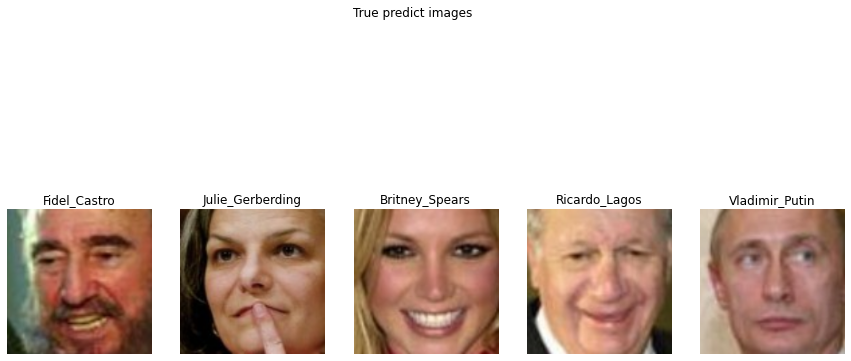

In [41]:
idx_sim = np.flatnonzero(np.array(y_preds) == np.array(labels_test))
fg, ax = plt.subplots(1, 5, figsize=(15, 8))
fg.suptitle('True predict images')

for i in range(1):
  for j in range(5):
    ax[j].imshow(D[idx_sim[i + j*7 + 2 ]])
    ax[j].set_title(y_preds[idx_sim[i + j*7 + 2 ]])
    ax[j].set_xlabel('Transform '+str(i+ j*7 + 2 ))
    ax[j].axis('off')

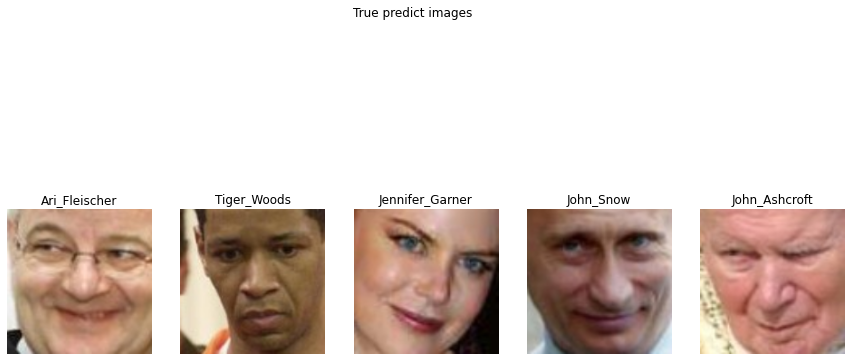

In [42]:
idx_diff = np.flatnonzero(np.array(y_preds) != np.array(labels_test))
fg, ax = plt.subplots(1, 5, figsize=(15, 8))
fg.suptitle('True predict images')

for i in range(1):
  for j in range(5):
    ax[j].imshow(D[idx_diff[i + j*7 + 2 ]])
    ax[j].set_title(y_preds[idx_diff[i + j*7 + 2 ]])
    ax[j].set_xlabel('Transform '+str(i+ j*7 + 2 ))
    ax[j].axis('off')